In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("activity train.csv")

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
data.shape

(7352, 563)

In [5]:
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
Y=data.iloc[:,cols-1:cols]
x_train=np.matrix(X.values)
y_train=np.matrix(Y.values)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_train

C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [7]:
data_null=data.isnull().sum()
data_null=data_null.drop(data_null[data_null==0].index).sort_values(ascending=False)
data_null

Series([], dtype: int64)

In [8]:
from sklearn.cross_validation import train_test_split
x_train_1,x_test,y_train_1,y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=0)

C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train_1,y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
pred=lg.predict(x_test)
pred

array([0, 2, 4, ..., 5, 5, 5], dtype=int64)

In [74]:
score=lg.score(x_test,y_test)
score2=lg.score(x_train,y_train)
print(score2)
print(score)

0.9892546245919478
0.985494106980961


In [12]:
ftest=pd.read_csv('activity_test.csv')
ftest.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [13]:
cols=data.shape[1]
fX=data.iloc[:,0:cols-1]
fY=data.iloc[:,cols-1:cols]
fx=np.matrix(fX.values)
fy=np.matrix(fY.values)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fy=le.fit_transform(fy)
fy

C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [14]:
data_null_test=ftest.isnull().sum()
data_null_test=data_null_test.drop(data_null_test[data_null_test==0].index).sort_values(ascending=False)
data_null_test

Series([], dtype: int64)

In [15]:
predf=lg.predict(fx)
predf

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [16]:
score=lg.score(fx,fy)
score

0.9892546245919478

In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=10)

In [34]:
line=np.linspace(0,1,15)
lg_param_grid = {"C":[0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5, 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1]}

gslg = GridSearchCV(lg,param_grid = lg_param_grid, cv=kfold, scoring="accuracy")

gslg.fit(x_train,y_train)
lg_best = gslg.best_estimator_
gslg.best_score_

0.9468171926006529

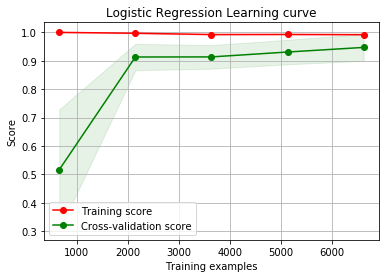

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(lg,"Logistic Regression Learning curve",x_train,y_train,cv=kfold)

In [50]:
from sklearn.metrics import log_loss
proba=lg.predict_proba(x_train)
cost=log_loss(y_train,proba)
cost

0.0507547266869303

In [38]:
grid_mean_scores=[result.mean_validation_score for result in gslg.grid_scores_]

C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [43]:
gslg.cv_results_['mean_test_score']

array([0.93865615, 0.94069641, 0.94246464, 0.94382481, 0.94409684,
       0.9445049 , 0.94504897, 0.94491295, 0.94586507, 0.94600109,
       0.94613711, 0.94668118, 0.94681719])

In [59]:
gy_pred=gslg.predict(fx)

In [75]:
print(gslg.score(x_train,y_train))
print(gslg.score(fx,fy))

0.9911588683351469
0.9911588683351469


In [47]:
lg_best

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
gproba=gslg.predict_proba(x_train)
gcost=log_loss(y_train,gproba)
gcost

0.04244815505722533

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,gy_pred)

array([[1407,    0,    0,    0,    0,    0],
       [   0, 1256,   30,    0,    0,    0],
       [   0,   34, 1340,    0,    0,    0],
       [   0,    0,    0, 1225,    0,    1],
       [   0,    0,    0,    0,  986,    0],
       [   0,    0,    0,    0,    0, 1073]], dtype=int64)

In [62]:
confusion_matrix(y_train,predf)

array([[1407,    0,    0,    0,    0,    0],
       [   0, 1244,   42,    0,    0,    0],
       [   0,   36, 1338,    0,    0,    0],
       [   0,    0,    0, 1225,    0,    1],
       [   0,    0,    0,    0,  986,    0],
       [   0,    0,    0,    0,    0, 1073]], dtype=int64)

In [72]:
gslg.predict_proba(x_test)

array([[9.98955913e-01, 5.53222264e-09, 1.02705424e-03, 7.41116282e-10,
        1.70214707e-05, 4.87616856e-09],
       [1.20065348e-05, 3.42152202e-02, 9.65720257e-01, 9.06742580e-06,
        4.34486994e-05, 3.37717134e-11],
       [1.29421985e-05, 2.83551317e-09, 2.98638187e-06, 1.14547152e-06,
        9.82278983e-01, 1.77039406e-02],
       ...,
       [1.52688663e-04, 9.05527936e-03, 2.62364916e-07, 3.67314258e-03,
        3.45242160e-03, 9.83666205e-01],
       [2.15590247e-05, 3.73486865e-07, 2.20954632e-06, 2.23576021e-04,
        1.71535452e-03, 9.98036927e-01],
       [2.74584439e-05, 2.53902775e-03, 1.63705698e-04, 7.99078143e-04,
        1.42737533e-04, 9.96327992e-01]])

In [73]:
lg.predict_proba(x_test)

array([[9.98495877e-01, 3.15117847e-08, 1.48480408e-03, 3.18748301e-09,
        1.92513949e-05, 3.27105655e-08],
       [1.79231673e-05, 5.87175531e-02, 9.41183051e-01, 2.23637811e-05,
        5.91088692e-05, 1.26172365e-10],
       [1.81093719e-05, 5.04503408e-09, 9.00451019e-06, 2.23509202e-06,
        9.75562874e-01, 2.44077719e-02],
       ...,
       [2.42794714e-04, 9.22295320e-03, 6.13338359e-07, 3.64480811e-03,
        1.06047420e-02, 9.76284089e-01],
       [3.37890528e-05, 5.53690499e-07, 7.93579198e-06, 3.65765305e-04,
        2.58677851e-03, 9.97005178e-01],
       [3.26572796e-05, 3.49664738e-03, 1.84009269e-04, 1.03494693e-03,
        4.01596497e-04, 9.94850143e-01]])